In [1]:
import json 
import pandas as pd

In [2]:
with open ("Lyrics_JohnMayer.json") as file:
    
    data = json.load(file)
    
    master_list = []
    
    for row in data['songs']:
        
        temp_dict = {}
        
        try: 
            temp_dict["title"] = row["title"]
        except:
            temp_dict["title"] = None
        
        try: 
            temp_dict["release_date"] = row["release_date"]
        except: 
            temp_dict["release_date"] = None
            
        try: 
            temp_dict["album"] = row["album"]["name"]
        except: 
            temp_dict["album"] = None
            
        try:     
            temp_dict["lyrics"] = row["lyrics"]
        except: 
            temp_dict["lyrics"] = None
        
        master_list.append(temp_dict)

In [3]:
df = pd.DataFrame(master_list)

In [4]:
df.dropna(inplace=True)

In [5]:
df['release_date'] = pd.to_datetime(df.release_date, format='%Y-%m-%d')

In [6]:
df["year"] = df["release_date"].dt.strftime('%Y')

In [7]:
pd.set_option('display.max_rows', None)

In [9]:
# df

In [11]:
df.to_pickle("Mayer.pkl")

In [14]:
df.lyrics[0]

"New Light Lyrics[Intro]\nAh, ah, ah\nAh...\n\n[Verse 1]\nI'm the boy in your other phone\nLighting up inside your drawer at home, all alone\nPushing 40 in the friend zone\nWe talk and then you walk away, every day\nOh, you don't think twice 'bout me\nAnd maybe you're right to doubt me, but\n[Chorus]\nBut if you give me just one night\nYou're gonna see me in a new light\nYeah, if you give me just one night\nTo meet you underneath the moonlight\nOh, I want a take two, I want to break through\nI wanna know the real thing about you\nSo I can see you in a new light\n\n[Verse 2]\nTake a ride up to Malibu\nI just wanna sit and look at you, look at you\nWhat would it matter if your friends knew?\nWho cares what other people say, anyway\nOh, we can go far from here\nAnd make a new world together, babe\n\n[Chorus]\n'Cause if you give me just one night\nYou're gonna see me in a new light\nYeah, if you give me just one night\nTo meet you underneath the moonlight\nOh, I want a take two, I want to 

In [15]:
df.lyrics[1]

"Gravity Lyrics[Chorus]\nGravity is working against me\nAnd gravity wants to bring me down\n\n[Verse 1]\nOh, I'll never know\nWhat makes this man, with all the love that his heart can stand\nDream of ways to throw it all away\n\n[Chorus]\nWoah, woah\nGravity is working against me\nAnd gravity wants to bring me down\n[Verse 2]\nOh, twice as much ain't twice as good\nAnd can't sustain like one half could\nIt's wanting more that's gonna send me to my knees\n\n[Guitar Solo]\n\n[Repeat Verse 2]\nOh, twice as much ain't twice as good\nAnd can't sustain like one half could\nIt's wanting more that's gonna send me to my knees\n\n[Chorus]\nWoah, woah\nGravity, stay the hell away from me\nWoah, woah\nGravity has taken better men than me\nNow, how can that be?\n\n[Outro]\nJust keep me where the light is\nJust keep me where the light is\nJust keep me where the light is\nCome on, keep me where the light is\nCome on, keep me where the light is\nCome on, keep me where, now, keep me where the light isY

In [10]:
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
custom_stop_words = ['oh', 'yeah', 'ah', 'ay', 'ooh']
stop_words.update(custom_stop_words)

def clean_lyrics(lyrics):
    # Remove text inside brackets and parentheses
    lyrics = re.sub(r'\[.*?\]|\(.*?\)', '', lyrics)
    # Remove numbers
    lyrics = re.sub(r'\d+', '', lyrics)
    # Remove punctuations and newline characters
    lyrics = re.sub(r'[^\w\s]', '', lyrics).replace('\n', ' ')
    # Convert to lowercase
    lyrics = lyrics.lower()
    
     # Remove stop words
    lyrics = ' '.join([word for word in lyrics.split() if word not in stop_words])
    
    # Split words containing "embed" and keep only the non-"embed" part
    lyrics = ' '.join([word.split('embed')[0] if 'embed' in word else word for word in lyrics.split()])
    
    return lyrics.strip()

# Example usage
df['clean_lyrics'] = df['lyrics'].apply(clean_lyrics)


In [11]:
df.clean_lyrics[0]

'new light lyrics im boy phone lighting inside drawer home alone pushing friend zone talk walk away every day dont think twice bout maybe youre right doubt give one night youre gonna see new light give one night meet underneath moonlight want take two want break wanna know real thing see new light take ride malibu wanna sit look look would matter friends knew cares people say anyway go far make new world together babe cause give one night youre gonna see new light give one night meet underneath moonlight want take two want break wanna know real thing see new light might also like give one night youre gonna see new light give one night meet underneath moonlight love thats runnin veins love thats runnin veins love thats runnin veins yeah'

In [12]:
df.clean_lyrics[3]

'daughters lyrics know girl puts color inside world shes like maze walls continually change ive done stand steps heart hand im starting see maybe got nothing fathers good daughters daughters love like girls become lovers turn mothers mothers good daughters see skin shes standing since day saw walking away shes left cleaning mess made fathers good daughters daughters love like girls become lovers turn mothers mothers good daughters boys break find much take boys strong boys soldier boys would gone without warmth womans good good heart behalf every man looking every girl god weight world might also like fathers good daughters daughters love like girls become lovers turn mothers mothers good daughters mothers good daughters mothers good daughters too'

In [13]:
df.to_pickle("Mayer_cleaned.pkl")

In [14]:
songs_by_album = df.groupby([df.album]).size().reset_index(name = 'count')
songs_by_album.sort_values(by='count', ascending=False).reset_index(drop=True)

,album,count
0,Born and Raised,13
1,Continuum,13
2,Room For Squares [Japanese Edition],13
3,Battle Studies,12
4,The Search for Everything,12
5,Paradise Valley,11
6,Sob Rock,10
7,Heavier Things,9
8,Inside Wants Out,5
9,Where The Light Is: John Mayer Live in Los Ang...,5


In [15]:
album_list = songs_by_album['album'].tolist()

In [16]:
album_list

['Any Given Thursday',
 'Battle Studies',
 'Born and Raised',
 'Continuum',
 'Heavier Things',
 'Inside Wants Out',
 'Paradise Valley',
 'Room For Squares [Japanese Edition]',
 'Sob Rock',
 'The Search for Everything',
 'Waiting on the World to Change [Limited Edition EP]',
 'Where The Light Is: John Mayer Live in Los Angeles',
 'Yes We Can: Voices of a Grassroots Movement']

In [17]:
album_drop = ['Waiting on the World to Change [Limited Edition EP]','Yes We Can: Voices of a Grassroots Movement']

In [18]:
df = df[df.album.isin(album_drop) == False]

In [19]:
songs_by_album = df.groupby([df.album]).size().reset_index(name = 'count')
songs_by_album.sort_values(by='count', ascending=False).reset_index(drop=True)

,album,count
0,Born and Raised,13
1,Continuum,13
2,Room For Squares [Japanese Edition],13
3,Battle Studies,12
4,The Search for Everything,12
5,Paradise Valley,11
6,Sob Rock,10
7,Heavier Things,9
8,Inside Wants Out,5
9,Where The Light Is: John Mayer Live in Los Ang...,5


In [21]:
grouped_lyrics = df.groupby('album')['clean_lyrics'].apply(lambda x: ' '.join(x)).reset_index()


In [22]:
grouped_lyrics

,album,clean_lyrics
0,Any Given Thursday,covered rain lyrics days world getting colder ...
1,Battle Studies,heartbreak warfare lyrics lightning strike ins...
2,Born and Raised,born raised lyrics pace place cant retrace got...
3,Continuum,gravity lyrics gravity working gravity wants b...
4,Heavier Things,daughters lyrics know girl puts color inside w...
5,Inside Wants Out,comfortable lyrics remembered time market snuc...
6,Paradise Valley,paper doll lyrics paper doll come try step bla...
7,Room For Squares [Japanese Edition],neon lyrics sky blue gets dark enough see colo...
8,Sob Rock,new light lyrics im boy phone lighting inside ...
9,The Search for Everything,blood lyrics much mother mother left much love...


In [23]:
recent_year = df.groupby('album')['year'].max().reset_index()

In [24]:
songs_by_album = grouped_lyrics.merge(recent_year, on='album')

In [28]:
songs_by_album = songs_by_album.sort_values('year', ascending=False, ignore_index=True)

In [29]:
songs_by_album

,album,clean_lyrics,year
0,Sob Rock,new light lyrics im boy phone lighting inside ...,2021
1,The Search for Everything,blood lyrics much mother mother left much love...,2017
2,Paradise Valley,paper doll lyrics paper doll come try step bla...,2013
3,Born and Raised,born raised lyrics pace place cant retrace got...,2012
4,Battle Studies,heartbreak warfare lyrics lightning strike ins...,2010
5,Where The Light Is: John Mayer Live in Los Ang...,free fallin lyrics shes good girl loves mama l...,2008
6,Continuum,gravity lyrics gravity working gravity wants b...,2007
7,Heavier Things,daughters lyrics know girl puts color inside w...,2004
8,Any Given Thursday,covered rain lyrics days world getting colder ...,2003
9,Room For Squares [Japanese Edition],neon lyrics sky blue gets dark enough see colo...,2003


In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image



In [31]:
mask = np.array(PIL.Image.open("guitar_6.png"))
colormap = ImageColorGenerator(mask)

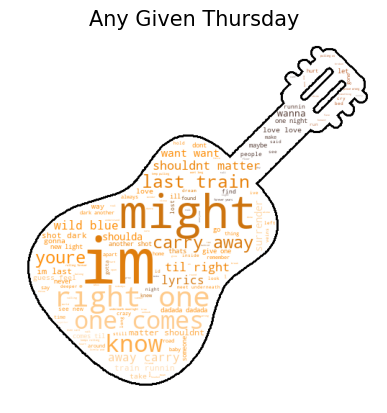

In [32]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      width=800, height=800,
                      mask = mask,
                      background_color = 'white',
                      contour_color = 'black',
                      contour_width = 2,
                      min_font_size = 3,
                      max_words = 400).generate(songs_by_album.loc[0, 'clean_lyrics'])

wordcloud.recolor(color_func = colormap)
plt.imshow(wordcloud) #interpolation = 'bilinear')
plt.axis("off")
plt.title("Any Given Thursday", fontsize=15)
plt.show()
                      

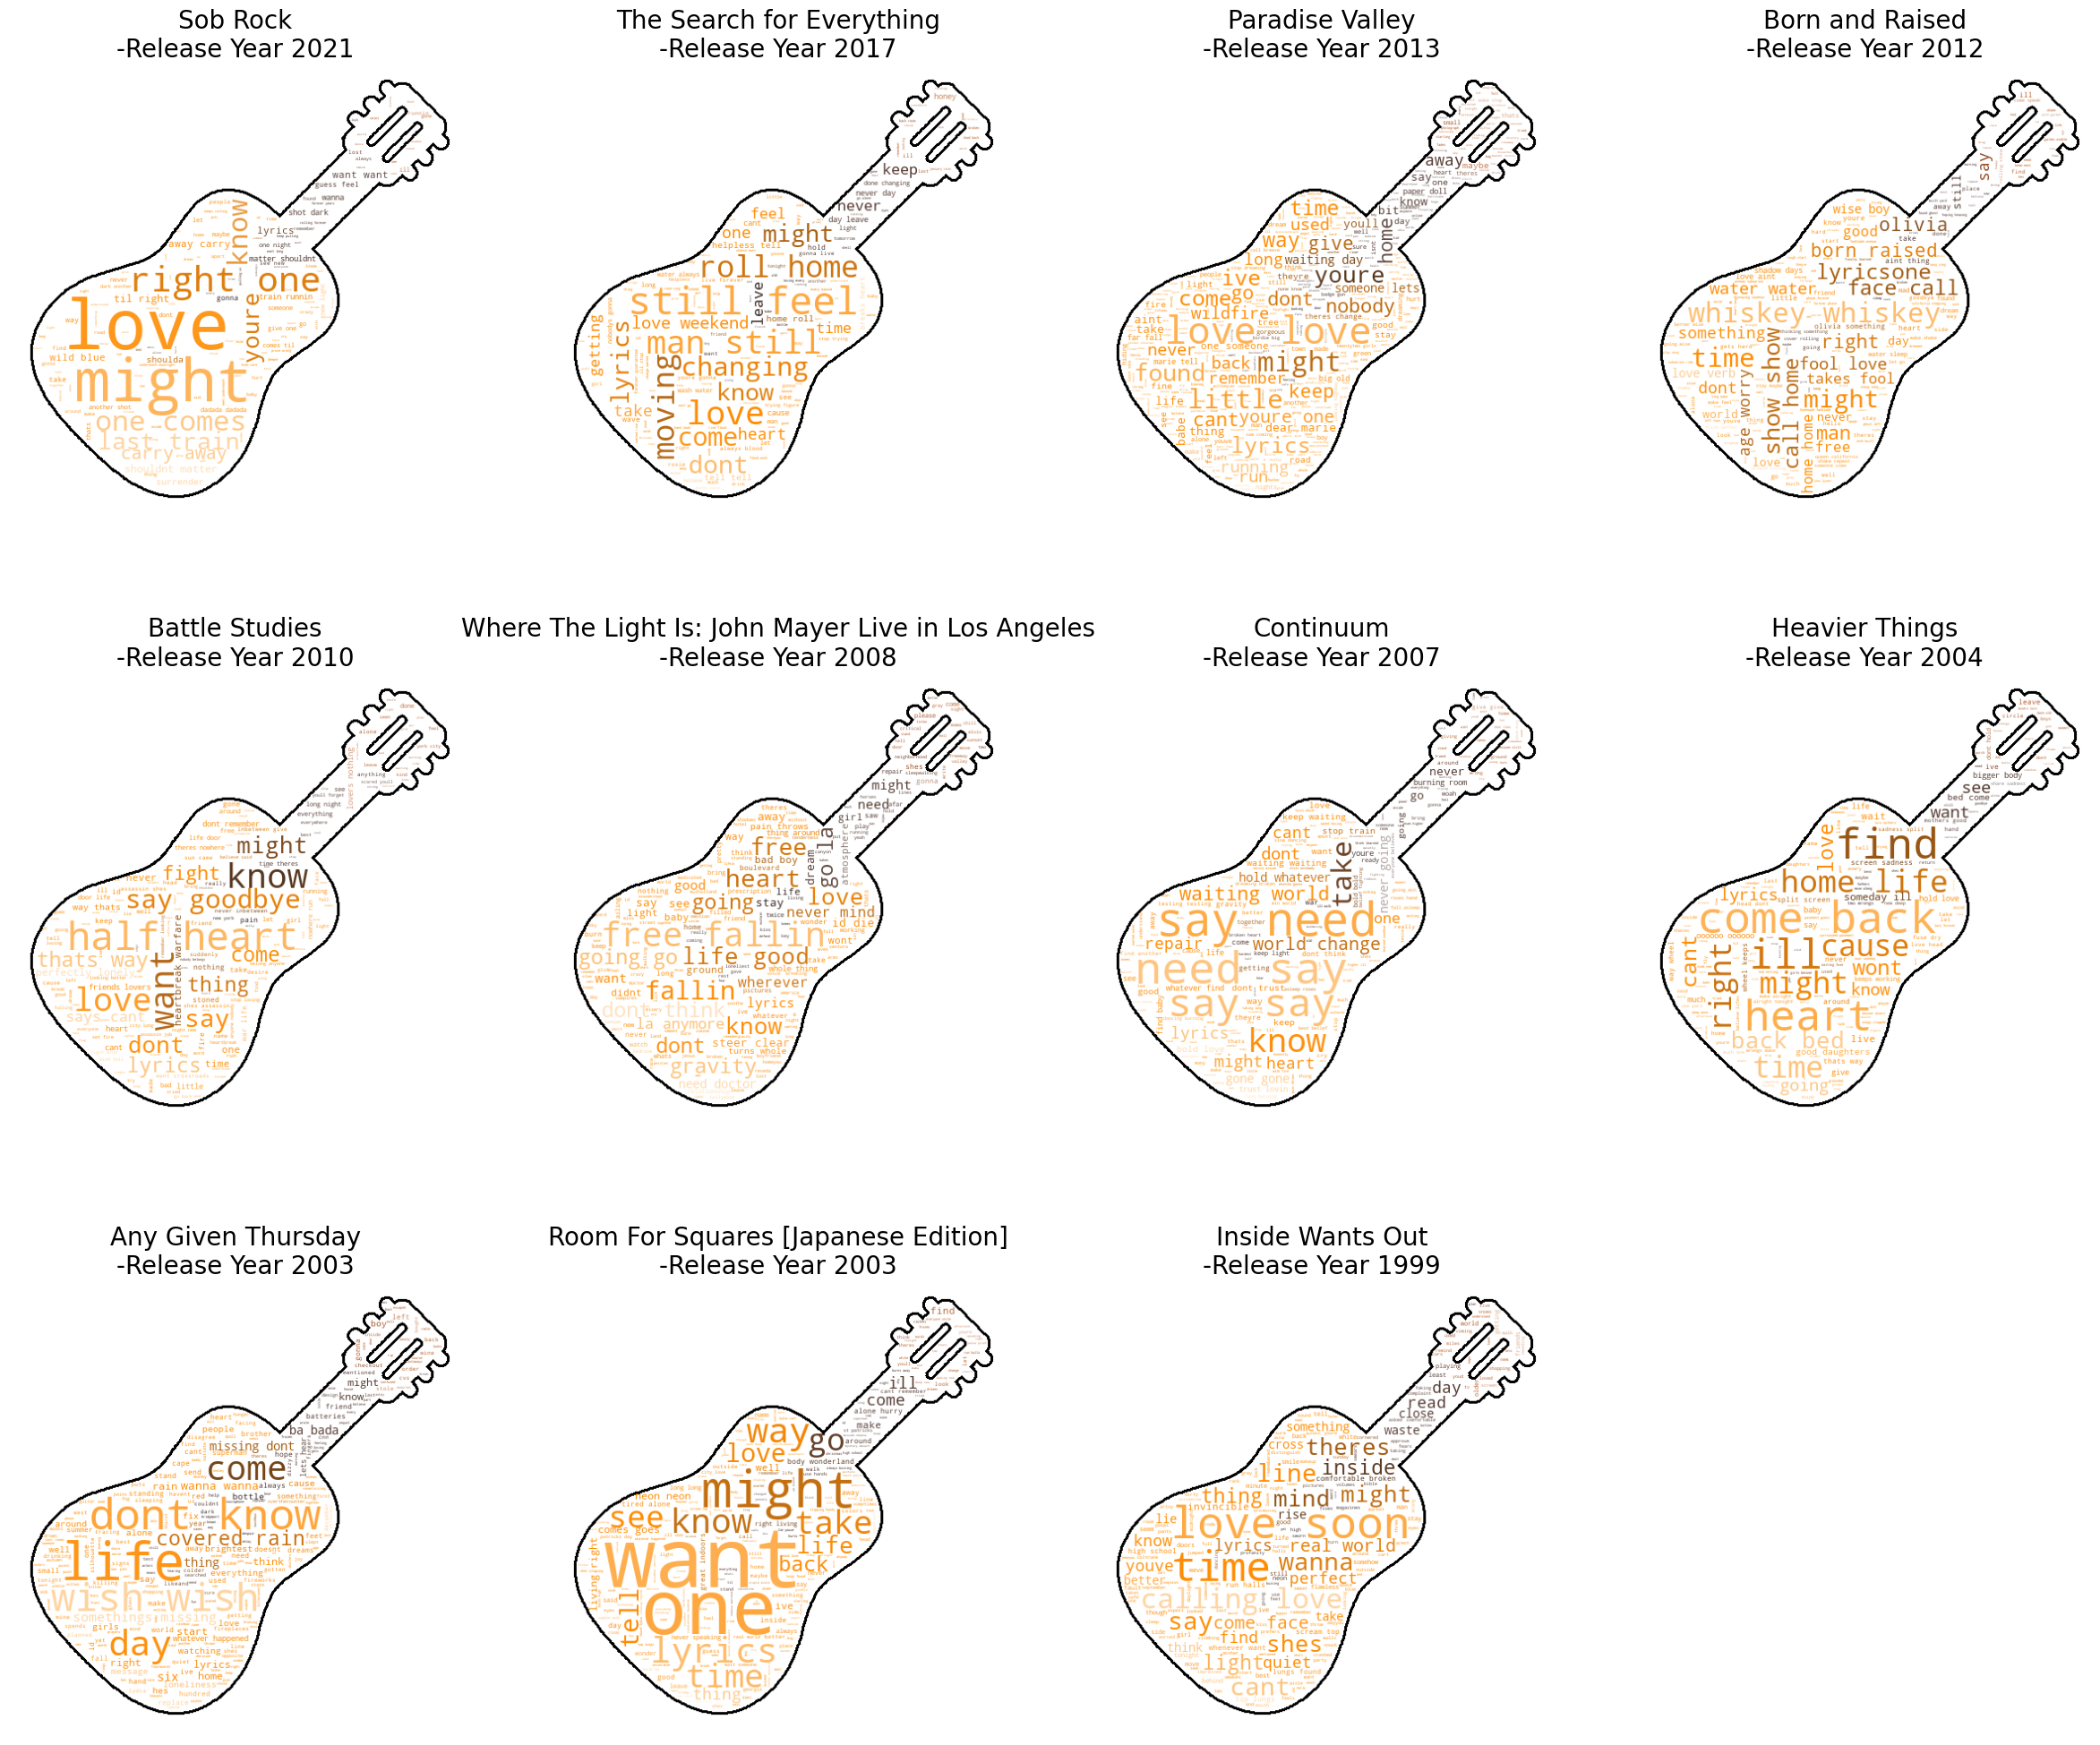

In [37]:
# Create a 5x2 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(30, 25))
fig.delaxes(axs[2,3])

for i in range(len(grouped_lyrics)):
    
    wordcloud = WordCloud(stopwords = set(list(STOPWORDS)+["im", "got"]),
                      width=1000, height=800,
                      mask = mask,
                      background_color = 'white',
                      contour_color = 'black',
                      contour_width = 2,
                      min_font_size = 3,
                      max_words = 400).generate(songs_by_album.loc[i, 'clean_lyrics'])

    wordcloud.recolor(color_func = colormap)

# Add a title to the word cloud with the corresponding album name
    album_title = songs_by_album.loc[i, 'album'] + '\n-Release Year '+ songs_by_album.loc[i, 'year'] 
    axs[i // 4, i % 4].set_title(album_title, fontsize=20)
    axs[i // 4, i % 4].imshow(wordcloud)
    axs[i // 4, i % 4].axis('off')
    

# Save the figure as a PNG file
plt.savefig('wordclouds.png', dpi=300, bbox_inches='tight')
